<style>
html, body, p{
    text-align: justify !important;
    text-justify: inter-word !important;
    font-size:22px !important;
}

.centrado{
    display:flex;
    align-items:center;
    justify-content:center;
    flex-direction:column;
    font-size:30px;
}
</style>

<div class="centrado"><img src="https://estadisticaccbas.uaa.mx/pluginfile.php/2/course/section/1/LOGOBENEMERITA_CIRCULAR.png?time=1606497553373" style="max-width: 508px;"></div>

<div class="centrado">

<b>Alumno</b>

Vélez Durán Enrique

279600

8 - A

Ingeniería en Computación Inteligente

Centro de Ciencias Básicas

<b>Tarea</b>

Práctica Momentos e Invariantes

31 de Mayo de 2024
</div>

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as kikin
import pandas as pd

## Cargamos la imagen

In [5]:
# Cargar la imagen
image_path = 'img/home.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB

## Funciones para transfomar la imagen

### Función para trasladar la imagen

In [6]:
def trasladar_imagen(image, tx, ty):
    rows, cols, _ = image.shape
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(image, M, (cols, rows))

### Función para rotar la imagen

In [7]:
def rotar_imagen(image, angle):
    rows, cols, _ = image.shape
    M = cv2.getRotationMatrix2D((cols/2, rows/2), angle, 1)
    return cv2.warpAffine(image, M, (cols, rows))

### Función para escalar la imagen

In [8]:
def escalar_imagen(image, fx, fy):
    return cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)

## Para rotar la imagen

In [9]:
imagen_transformada = rotar_imagen(image, 45)

## Impresión de las imagenes

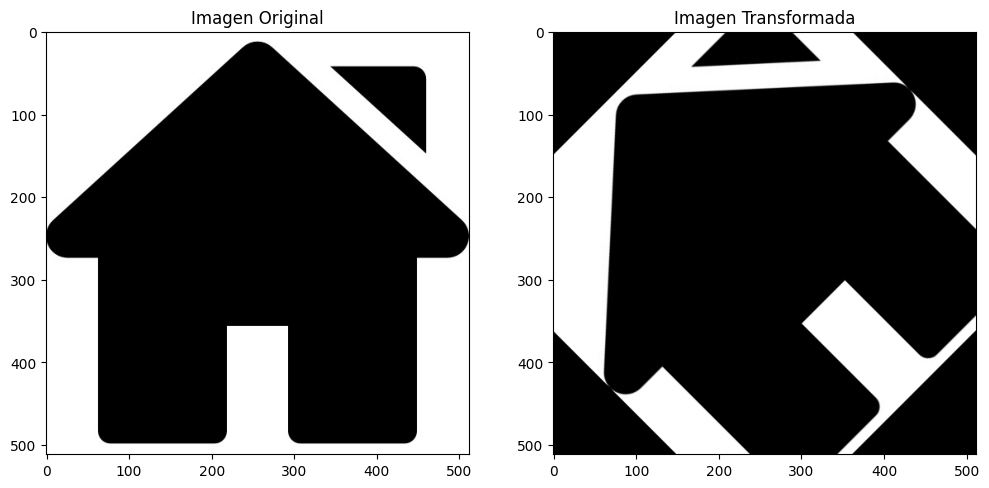

In [10]:
kikin.figure(figsize=(12, 6))
kikin.subplot(1, 2, 1)
kikin.title('Imagen Original')
kikin.imshow(image)
kikin.subplot(1, 2, 2)
kikin.title('Imagen Transformada')
kikin.imshow(imagen_transformada)
kikin.show()

## Función que calcula la intensidad de cada pixel

In [11]:
def calcular_intensidad(image):
    return 0.299 * image[:, :, 0] + 0.587 * image[:, :, 1] + 0.114 * image[:, :, 2]

### Calcula la intensidad de la imagen original y la transformada

In [12]:
intensidad_original = calcular_intensidad(image)
intensidad_transformada = calcular_intensidad(imagen_transformada)

### Guarda las intensidades de la imagen original y la transformada ex txt

In [13]:
np.savetxt('intensidad_original.txt', intensidad_original, fmt='%0.2f')
np.savetxt('intensidad_transformada.txt', intensidad_transformada, fmt='%0.2f')

## Función para calcular los momentos

In [14]:
def calcular_momentos(image):
    momentos = cv2.moments(image)
    return momentos

### Calcula los momentos de la imagen original y la transformada

In [15]:
momentos_original = calcular_momentos(intensidad_original)
momentos_transformadas = calcular_momentos(intensidad_transformada)

### Función para guardar los momentos en un txt

In [16]:
def guardar_momentos(filename, moments):
    with open(filename, 'w') as file:
        for key, value in moments.items():
            file.write(f'{key}: {value}\n')

### Guardamos los momentos en un txt para imagen original y transformada

In [17]:
guardar_momentos('momentos_original.txt', momentos_original)
guardar_momentos('momentos_transformados.txt', momentos_transformadas)

## Función para calcular centroide

In [18]:
def calcular_centroide(moments):
    cx = moments['m10'] / moments['m00']
    cy = moments['m01'] / moments['m00']
    return (cx, cy)

### Calculamos centroide de la imagen original y la transformada

In [19]:
centroide_original = calcular_centroide(momentos_original)
centroide_transformado = calcular_centroide(momentos_transformadas)

### Graficamos el centroide de la imagen original y la transformada

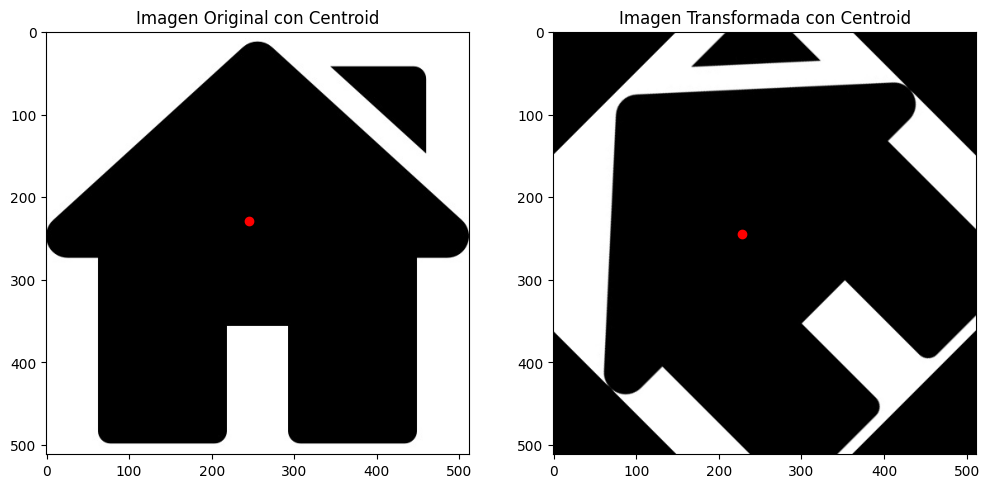

In [20]:
kikin.figure(figsize=(12, 6))
kikin.subplot(1, 2, 1)
kikin.title('Imagen Original con Centroid')
kikin.imshow(image)
kikin.scatter([centroide_original[0]], [centroide_original[1]], color='red')

kikin.subplot(1, 2, 2)
kikin.title('Imagen Transformada con Centroid')
kikin.imshow(imagen_transformada)
kikin.scatter([centroide_transformado[0]], [centroide_transformado[1]], color='red')
kikin.show()

## Función para calcular los momentos centrales normalizados hasta el orden 3

In [21]:
def calcular_momentos_centrales_normalizados(moments):
    nu20 = moments['mu20'] / (moments['m00'] ** 2)
    nu02 = moments['mu02'] / (moments['m00'] ** 2)
    nu11 = moments['mu11'] / (moments['m00'] ** 2)
    nu30 = moments['mu30'] / (moments['m00'] ** 2.5)
    nu12 = moments['mu12'] / (moments['m00'] ** 2.5)
    nu21 = moments['mu21'] / (moments['m00'] ** 2.5)
    nu03 = moments['mu03'] / (moments['m00'] ** 2.5)
    return {
        'nu20': nu20, 'nu02': nu02, 'nu11': nu11,
        'nu30': nu30, 'nu12': nu12, 'nu21': nu21, 'nu03': nu03
    }

### Calculamos los momentos centrales normalizados hasta el orden 3 de la imagen original y de la transformada

In [22]:
momentos_normalizados_original = calcular_momentos_centrales_normalizados(momentos_original)
momentos_normalizados_transformados = calcular_momentos_centrales_normalizados(momentos_transformadas)

### Guardamos en un txt los momentos centrales de la imagen original y de la transformada

In [23]:
guardar_momentos('momentos_normalizados_original.txt', momentos_normalizados_original)
guardar_momentos('momentos_normalizados_transformados.txt', momentos_normalizados_transformados)

## Función para calcular momentos Hu

In [24]:
def calcular_momentos_hu(moments):
    hu_moments = cv2.HuMoments(moments).flatten()
    return hu_moments

### Calcular momentos de la imagen original y de la transformada

In [25]:
momentos_hu_original = calcular_momentos_hu(momentos_original)
momentos_hu_transformados = calcular_momentos_hu(momentos_transformadas)

### Guardamos en un txt los momentos Hu de la imagen original y de la transformada

In [26]:
np.savetxt('momentos_hu_original.txt', momentos_hu_original, fmt='%0.5e')
np.savetxt('momentos_hu_transformados.txt', momentos_hu_transformados, fmt='%0.5e')

## Creamos una tabla comparativa de los momentos centrales normalizados y los momentos de Hu


In [27]:
data_normalizado = {
    'Moment': ['nu20', 'nu02', 'nu11', 'nu30', 'nu12', 'nu21', 'nu03'],
    'Original': [momentos_normalizados_original[key] for key in momentos_normalizados_original],
    'Transformed': [momentos_normalizados_transformados[key] for key in momentos_normalizados_transformados]
}
data_hu = {
    'Moment': [f'Hu{i+1}' for i in range(7)],
    'Original': momentos_hu_original,
    'Transformed': momentos_hu_transformados
}

df_normalized = pd.DataFrame(data_normalizado)
df_hu = pd.DataFrame(data_hu)

## Guardamos las tablas comparativas en un txt

In [28]:
# Guardar tablas comparativas en txt
with open('tabla_comparativa_normalizado.txt', 'w') as file:
    file.write(df_normalized.to_string(index=False))

with open('tabla_comparativa_hu.txt', 'w') as file:
    file.write(df_hu.to_string(index=False))

print("Tablas comparativas guardadas exitosamente.")

Tablas comparativas guardadas exitosamente.


## Conclusión

### En esta práctica, aprendimos a usar Python para transformar y analizar imágenes. Realizamos una rotación en una imagen y comparamos la original con la transformada. Calculamos la intensidad de cada píxel y los momentos geométricos, que nos ayudaron a entender cómo se distribuye la "masa" de la imagen.

### Guardamos estos datos en archivos de texto y creamos tablas comparativas para ver las diferencias entre la imagen original y la transformada. Esto nos enseñó cómo las transformaciones afectan las características de una imagen y cómo podemos usar matemáticas para describir y analizar esas características.

### Esta práctica nos mostró herramientas útiles para trabajar con imágenes y nos ayudó a entender mejor cómo se pueden analizar y comparar.